In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# data=pd.read_csv("/Users/siddharthkumar2023/Downloads/student+performance/student/student-mat.csv",sep=';')

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)

In [21]:
x = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  #target

In [ ]:
# x = data[['studytime', 'failures', 'absences']]
# y = (data['G3'] >= 10).astype(int)  # Binary target variable: 1 for pass, 0 for fail


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
model = LogisticRegression(max_iter=1000)

model.fit(x_train,y_train)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
y_pred=model.predict(x_test)

In [31]:
#evaluation
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')



Accuracy: 0.9229098805646037
Confusion Matrix:
[[506  25]
 [ 46 344]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

ROC AUC Score: 0.9174851513834563


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Use a pipeline to scale then fit the model
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [36]:
cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy')
print(f'Cross-validated Accuracy: {cv_score.mean()}')

Cross-validated Accuracy: 0.9171890031123267


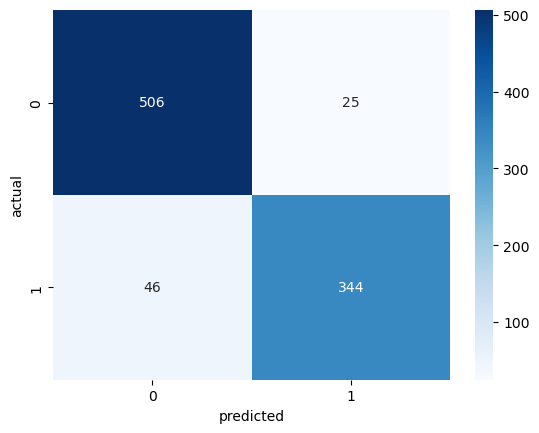

In [37]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()


NameError: name 'roc_curve' is not defined